In [1]:
import numpy as np
import pandas as pd

In [2]:
nyt_train_path = 'NYTdata/train.txt'
nyt_test_path = 'NYTdata/test.txt'
uw_train_path = 'naacl_data/train_CS_random'
uw_test_path = 'naacl_data/test'

In [3]:
nyt_train_pd = pd.read_csv(nyt_train_path, 
                           sep='\t', 
                           low_memory=False,
                           names=['e1_id', 'e2_id', 'e1_text', 'e2_text', 'r', 'sentence'])
nyt_test_pd = pd.read_csv(nyt_test_path, 
                          sep='\t', 
                          low_memory=False,
                          names=['e1_id', 'e2_id', 'e1_text', 'e2_text', 'r', 'sentence', 'end'])

In [4]:
uw_train_pd = pd.read_csv(uw_train_path,
                          sep='\t',
                          low_memory=False,
                          names=['e1_text', 'e1_s', 'e1_e', 'e2_text', 'e2_s', 'e2_e', 
                                 's_id', 'crowd_label', 'sentence', 
                                 'f1', 'f2', 'f3', 'str1', 'dep', 'dir', 'str2'])
uw_test_pd = pd.read_csv(uw_test_path,
                         sep='\t',
                         low_memory=False,
                         names=['s_id', 'e1_text', 'e2_text', 'labels', 'sentence'])

In [6]:
def count_by_column(df, column_name):
    df_count = df.groupby(column_name).count()
    names = list(df_count.index.values)
    counts = list(df_count.values[:, 0])
    name_count = [(n, c) for n, c in zip(names, counts)]
    return sorted(name_count, key=lambda x: x[1], reverse=True)

In [8]:
nyt_counts = count_by_column(nyt_train_pd, 'r')
uw_counts = count_by_column(uw_train_pd, 'crowd_label')

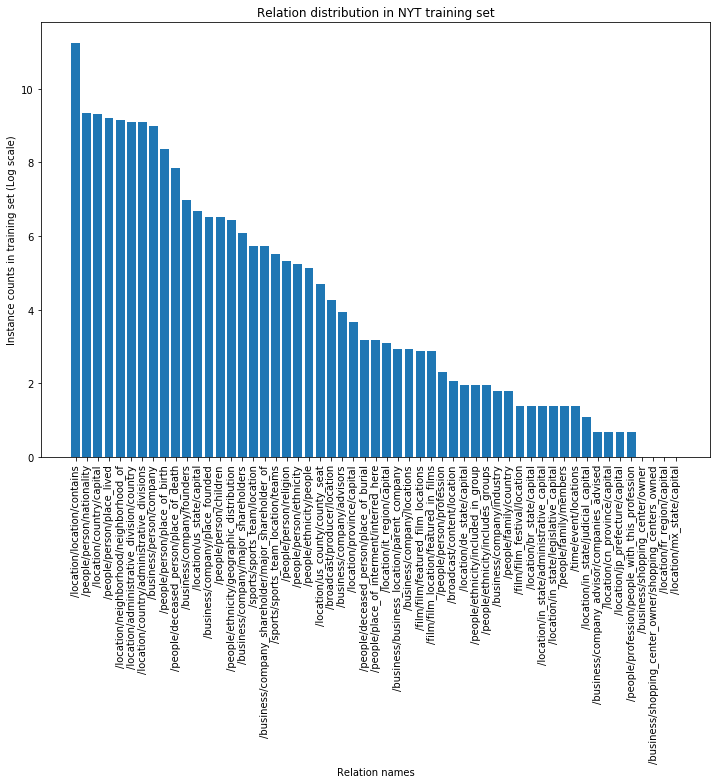

In [23]:
import matplotlib.pyplot as plt

nyt_names = [t[0] for t in nyt_counts]
nyt_nums = [t[1] for t in nyt_counts]
uw_names = [t[0] for t in uw_counts]
uw_nums = [t[1] for t in uw_counts]

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.bar(range(len(nyt_names)), np.log(nyt_nums))
plt.xticks(range(len(nyt_names)), nyt_names, rotation='vertical')
ax.set_xlabel('Relation names')
ax.set_ylabel('Instance counts in training set (Log scale)')
plt.title('Relation distribution in NYT training set')
plt.show()

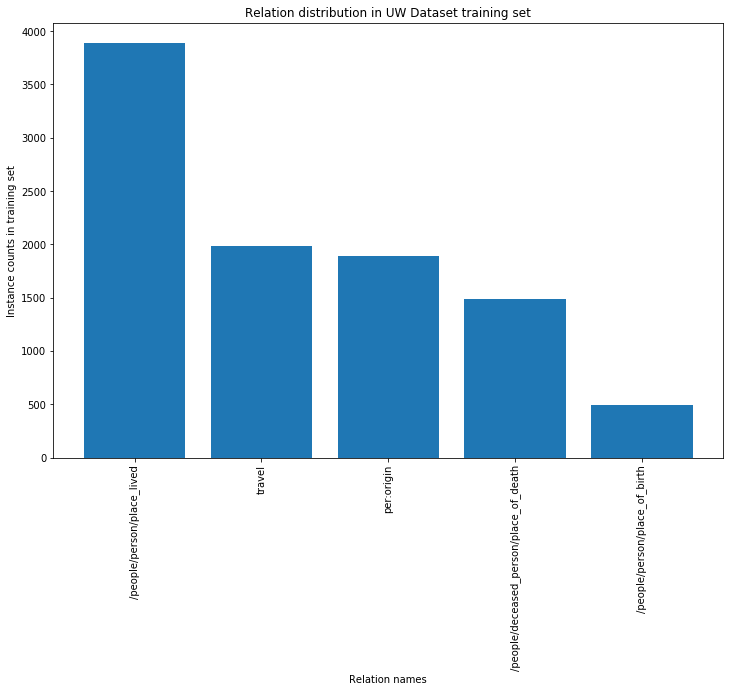

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.bar(range(len(uw_names)), uw_nums)
plt.xticks(range(len(uw_names)), uw_names, rotation='vertical')
ax.set_xlabel('Relation names')
ax.set_ylabel('Instance counts in training set')
plt.title('Relation distribution in UW Dataset training set')
plt.show()